# <font color = lightcoral>Setting Random Seed
>    
### <font color = red> Non-Overlapping Windows

> Running Combinations for Non-Overlapping Transformer Models
>

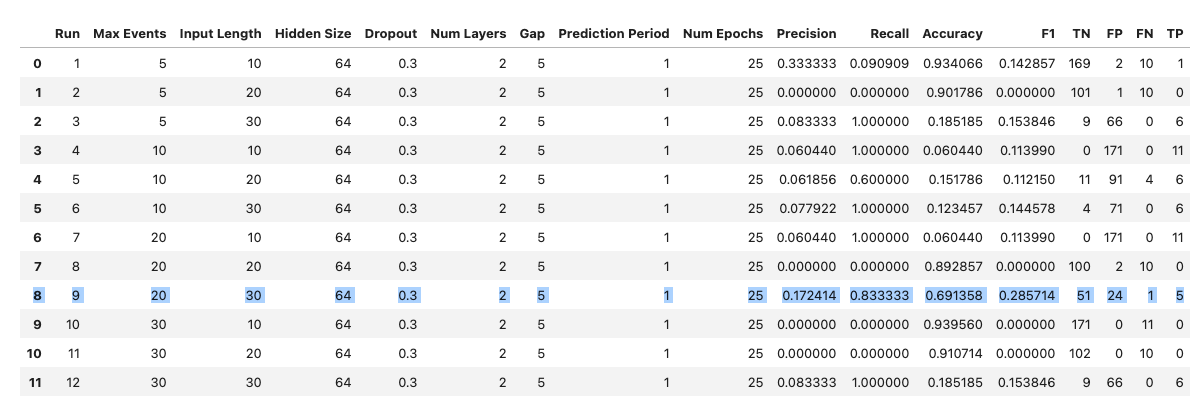

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


--

## <font color = lightsteelblue>EDA of Parsed File

---

In [ ]:
# import pandas as pd
# import time

# # Define the path to the CSV file
# # file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv"

# # file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')
# # file_path = os.path.join(base_dir, '/home/ubuntu/efs-w210-capstone-ebs/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.csv')
# # file_path = os.path.join(base_dir,'/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl/BGL.log_structured.csv')
# file_path = os.path.join(base_dir,'/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl/BGL_Sample.log_structured.csv')

# # Start timing
# start_time = time.time()

# # Read the CSV file
# df = pd.read_csv(file_path)

# # Section 1: Preview
# print("\n" + "*"*100)
# print("********************** Section 1: Preview ******************************************")
# print("*"*100 + "\n")
# display(df.head())

# # Section 2: Shape of the DataFrame
# print("\n" + "*"*100)
# print("********************** Section 2: Shape of the DataFrame ****************************")
# print("*"*100 + "\n")
# print(df.shape)

# # Section 3: DataFrame Information
# print("\n" + "*"*100)
# print("********************** Section 3: DataFrame Information ****************************")
# print("*"*100 + "\n")
# print(df.info())

# # Section 4: Summary Statistics (without scientific notation)
# print("\n" + "*"*100)
# print("********************** Section 4: Summary Statistics *******************************")
# print("*"*100 + "\n")
# pd.options.display.float_format = '{:,.0f}'.format
# print(df.describe())

# # Section 5: Unique Event Templates
# print("\n" + "*"*100)
# print("********************** Section 5: Unique Event Templates ***************************")
# print("*"*100 + "\n")
# print(df['EventTemplate'].nunique())

# # Section 6: Count of Each Event Template
# print("\n" + "*"*100)
# print("********************** Section 6: Count of Each Event Template *********************")
# print("*"*100 + "\n")
# print(df['EventTemplate'].value_counts().head())

# # Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
# print("\n" + "*"*100)
# print("********************** Section 7: Most Frequent Event Templates *********************")
# print("*"*100 + "\n")
# df_sorted = df.groupby(['EventId', 'EventTemplate']).size().reset_index(name='Occurrences')
# df_sorted = df_sorted.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)
# df_sorted.index += 1  # Make the index start from 1
# print(df_sorted.head())

# # Section 8: Alert Analysis
# print("\n" + "*"*100)
# print("********************** Section 8: Alert Analysis ************************************")
# print("*"*100 + "\n")

# # Count of normal vs alert logs
# label_counts = df['Label'].value_counts()
# print(f"Normal logs: {label_counts.get('-', 0)}")
# print(f"Alert logs: {label_counts.sum() - label_counts.get('-', 0)}")

# # Most frequent labels for alerts
# alert_labels = df[df['Label'] != '-']['Label'].value_counts().head()
# print("\nMost frequent alert labels:")
# print(alert_labels)

# # Distribution of alert levels
# alert_levels = df[df['Label'] != '-']['Level'].value_counts()
# print("\nDistribution of alert levels:")
# print(alert_levels)

# # Section 9: Label and Alert Level Analysis
# print("\n" + "*"*100)
# print("********************** Section 9: Label and Alert Level Analysis ********************")
# print("*"*100 + "\n")

# # Distribution of values in the Label column with an indicator for normal or alert
# df['LogType'] = df['Label'].apply(lambda x: 'Normal' if x == '-' else 'Alert')
# label_distribution = df.groupby(['LogType', 'Label']).size()
# print("\nDistribution of values in the Label column with an indicator for normal or alert:")
# display(label_distribution)

# # Distribution of values in the Level column for alerts
# alert_level_distribution = df[df['LogType'] == 'Alert'].groupby('Level').size().reset_index(name='count')
# alert_level_distribution['LogType'] = 'Alert'
# print("\nDistribution of values in the Level column for alerts:")
# display(alert_level_distribution[['LogType', 'Level', 'count']])

# # Distribution of values in the Level column for normal logs with an indicator for normal or alert
# normal_level_distribution = df[df['LogType'] == 'Normal'].groupby('Level').size().reset_index(name='count')
# normal_level_distribution['LogType'] = 'Normal'
# print("\nDistribution of values in the Level column for normal logs with an indicator for normal or alert:")
# display(normal_level_distribution[['LogType', 'Level', 'count']])

# # Section 10: Combined LogType, Label, Level, and Count
# print("\n" + "*"*100)
# print("********************** Section 10: Combined LogType, Label, Level, and Count ********")
# print("*"*100 + "\n")

# combined_distribution = df.groupby(['LogType', 'Label', 'Level']).size().reset_index(name='count')
# combined_distribution = combined_distribution.sort_values(by=['LogType', 'count', 'Label'], ascending=[False, False, True])
# display(combined_distribution)

# # Section 11: Count Unique Values in Each Column
# print("\n" + "*"*100)
# print("********************** Section 11: Count Unique Values in Each Column ****************")
# print("*"*100 + "\n")
# print(df.nunique())

# # Section 12: Random Sample of 10 Alert Rows
# print("\n" + "*"*100)
# print("********************** Section 12: Random Sample of 10 Alert Rows ********************")
# print("*"*100 + "\n")
# alert_rows = df[df['Label'] != '-']
# sample_alert_rows = alert_rows.sample(n=10) if len(alert_rows) >= 10 else alert_rows
# display(sample_alert_rows)

# # Section 13: Analysis of Rows for Normal and Alert Labels
# print("\n" + "*"*100)
# print("********************** Section 13: Analysis of Rows for Normal and Alert Labels ********")
# print("*"*100 + "\n")

# # Grouping by LogType to count rows for Normal and Alert logs
# logtype_counts = df['LogType'].value_counts()
# total_logs = logtype_counts.sum()
# normal_percentage = (logtype_counts['Normal'] / total_logs) * 100
# alert_percentage = (logtype_counts['Alert'] / total_logs) * 100

# print(f"Normal logs: {logtype_counts['Normal']} ({normal_percentage:.2f}%)")
# print(f"Alert logs: {logtype_counts['Alert']} ({alert_percentage:.2f}%)")

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

---

___
# <font color = darkkhaki> (D). Data Prep --> Create sample for sanity testing

In [ ]:
# import pandas as pd

# # Load the data
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl'
# input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"
# df = pd.read_parquet(input_file)

# # Split the data
# train_size = int(0.8 * len(df))
# train_df = df[:train_size]
# test_df = df[train_size:]

# # Save the splits
# train_output_file = f"{data_dir}/20240704__train__new_features_v1.10.parquet"
# test_output_file = f"{data_dir}/20240704__test__new_features_v1.10.parquet"

# train_df.to_parquet(train_output_file)
# test_df.to_parquet(test_output_file)

In [3]:
import pandas as pd

####################### Full Base ######################################
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/01.Full_Base/'
# input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"

####################### Sample Base ######################################
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/03.Sample_Base/'
input_file = f"{data_dir}/20240704__sample__new_features_v1.30.parquet"

####################### Full Test_Train ######################################
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/02.Full_Train_Test/'
# input_file = f"{data_dir}/20240704__train__new_features_v1.10.parquet"
# input_file = f"{data_dir}/20240704__test__new_features_v1.10.parquet"

####################### Sample Test_Train ######################################
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/04.Sample_Train_Test/'
# input_file = f"{data_dir}/20240705_train_claude.parquet"
# input_file = f"{data_dir}/20240705_test_claude.parquet"
# input_file = f"{data_dir}/X_train.parquet"

# Read the parquet file
df = pd.read_parquet(input_file)

# Count the number of rows
row_count = len(df)

print("*"*100 + "\n")
print("************************************** # Rows ********************************")

print(f"The number of rows in the parquet file is: {row_count}")

# print("*"*100 + "\n")
print("************************************** Distinct Records by Class ****************")

# Count the number of distinct records by Class
distinct_class_counts = df['Class'].value_counts()

print(f"The count of distinct records by Class is:\n{distinct_class_counts}")

print("************************************** Shape ***************************")

print(df.shape)

print("************************************** Columns *************************")

print(df.columns)

# print("*"*100 + "\n")
print("************************************** Display Sample ********************************")

# Select the first 8 columns (assuming they exist)
first_eight_columns = df.iloc[:, :12]  # Use indexing for columns

# Display the first few rows of the selected columns
display(first_eight_columns.head(5))

****************************************************************************************************

************************************** # Rows ********************************
The number of rows in the parquet file is: 100
************************************** Distinct Records by Class ****************
The count of distinct records by Class is:
Class
0    81
1    19
Name: count, dtype: int64
************************************** Shape ***************************
(100, 35440)
************************************** Columns *************************
Index(['time_start', 'time_start_int', 'Class', 'unique_events',
       'most_frequent_event', 'transitions', 'entropy', 'EventId_1',
       'EventId_2', 'EventId_3',
       ...
       'EventId_35424', 'EventId_35425', 'EventId_35426', 'EventId_35427',
       'EventId_35428', 'EventId_35429', 'EventId_35430', 'EventId_35431',
       'EventId_35432', 'EventId_35433'],
      dtype='object', length=35440)
**********************************

,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
0,2005-06-03 15:40:00,0,0,1,228,0,0.000000,228,228,228,228,228
1,2005-06-03 15:45:00,1,0,2,228,2,0.005288,228,228,228,228,228
2,2005-06-03 15:50:00,2,0,3,228,14,0.073091,228,228,228,228,228
3,2005-06-03 15:55:00,3,0,1,228,0,0.000000,228,228,228,228,228
4,2005-06-03 16:00:00,4,0,6,228,6,0.171708,228,228,228,228,228


----

# <font color = tomato> Loop

Run 1: max_events=5, input_length=10, hidden_size=64, dropout=0.3, num_layers=2, gap=5, prediction_period=1, num_epochs=25
Epoch [1/25], Loss: 0.8034
Epoch [2/25], Loss: 0.6509
Epoch [3/25], Loss: 0.6469
Epoch [4/25], Loss: 0.6585
Epoch [5/25], Loss: 0.7111
Epoch [6/25], Loss: 0.7063
Epoch [7/25], Loss: 0.7389
Epoch [8/25], Loss: 0.6766
Epoch [9/25], Loss: 0.5692
Epoch [10/25], Loss: 0.7028
Epoch [11/25], Loss: 0.6344
Epoch [12/25], Loss: 0.6588
Epoch [13/25], Loss: 0.7340
Epoch [14/25], Loss: 0.7098
Epoch [15/25], Loss: 0.6841
Epoch [16/25], Loss: 0.7205
Epoch [17/25], Loss: 0.6867
Epoch [18/25], Loss: 0.5980
Epoch [19/25], Loss: 0.7613
Epoch [20/25], Loss: 0.7039
Epoch [21/25], Loss: 0.5463
Epoch [22/25], Loss: 0.5777
Epoch [23/25], Loss: 0.8185
Epoch [24/25], Loss: 0.6695
Epoch [25/25], Loss: 0.6203
Run 1 completed
****************************************************************************************************

Run 2: max_events=5, input_length=20, hidden_size=64, dropout=0.3, n

,Run,Max Events,Input Length,Hidden Size,Dropout,Num Layers,Gap,Prediction Period,Num Epochs,Precision,Recall,Accuracy,F1,TN,FP,FN,TP
0,1,5,10,64,0.3,2,5,1,25,0.333333,0.090909,0.934066,0.142857,169,2,10,1
1,2,5,20,64,0.3,2,5,1,25,0.000000,0.000000,0.901786,0.000000,101,1,10,0
2,3,5,30,64,0.3,2,5,1,25,0.083333,1.000000,0.185185,0.153846,9,66,0,6
3,4,10,10,64,0.3,2,5,1,25,0.060440,1.000000,0.060440,0.113990,0,171,0,11
4,5,10,20,64,0.3,2,5,1,25,0.061856,0.600000,0.151786,0.112150,11,91,4,6
5,6,10,30,64,0.3,2,5,1,25,0.077922,1.000000,0.123457,0.144578,4,71,0,6
6,7,20,10,64,0.3,2,5,1,25,0.060440,1.000000,0.060440,0.113990,0,171,0,11
7,8,20,20,64,0.3,2,5,1,25,0.000000,0.000000,0.892857,0.000000,100,2,10,0
8,9,20,30,64,0.3,2,5,1,25,0.172414,0.833333,0.691358,0.285714,51,24,1,5
9,10,30,10,64,0.3,2,5,1,25,0.000000,0.000000,0.939560,0.000000,171,0,11,0


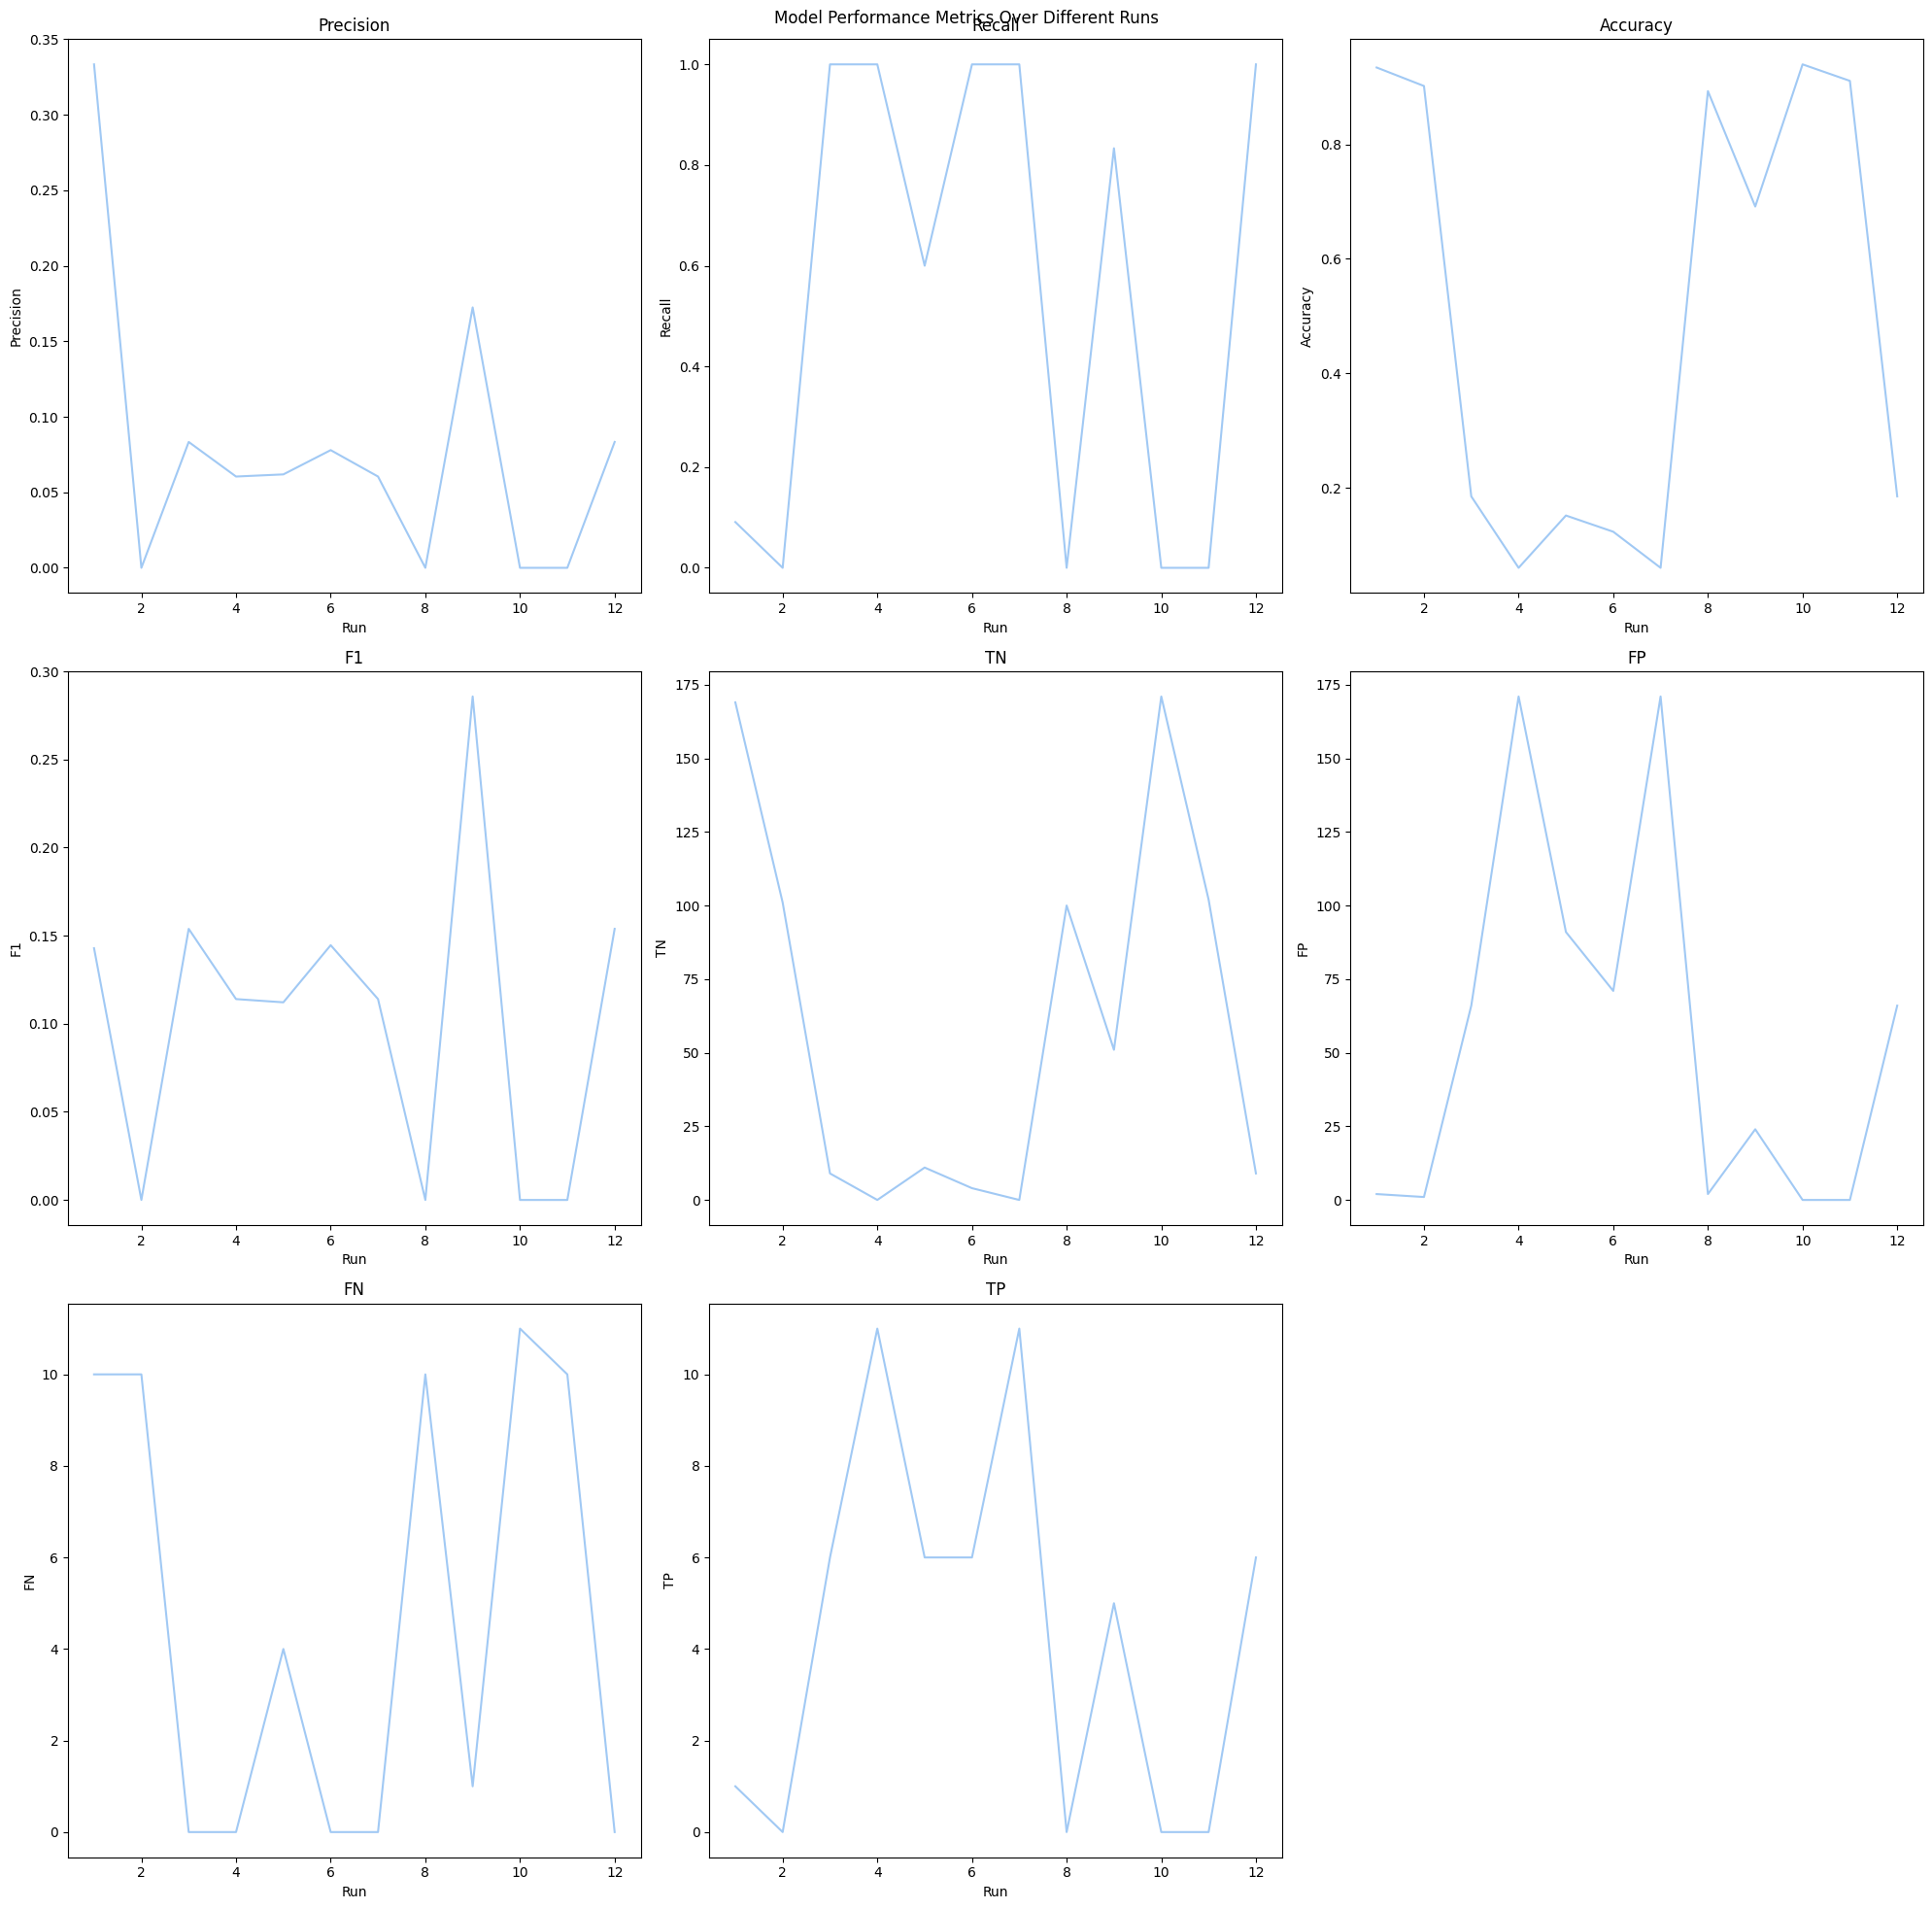

In [2]:
################################### Parameters and Hyperparameters ################################

# Parameters and Hyperparameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/01.Full_Base/'
input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"
output_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/02.Full_Train_Test'

####################### Sample Base ######################################
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/03.Sample_Base/'
# input_file = f"{data_dir}/20240704__sample__new_features_v1.30.parquet"
# output_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/04.Sample_Train_Test'

# Hyperparameter variations to test
# max_events_list = [5, 10, 20, 30, 40, 50, 100]  # Different values to test
max_events_list = [5, 10, 20, 30]  # Different values to test
input_length_list = [10, 20, 30]  # Different values to test
hidden_size_list = [64]  # Different values to test
dropout_list = [0.3]  # Different values to test
num_layers_list = [2]  # Different values to test
gap_list = [5]  # Different values to test
prediction_period_list = [1]  # Different values to test
num_epochs_list = [25]  # Different values to test

test_size = 0.2
shuffle = False

output_size = 1
batch_size = 16
learning_rate = 0.001

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# DataFrame to track results
results_df = pd.DataFrame(columns=['Run', 'Max Events', 'Input Length', 'Hidden Size', 'Dropout', 'Num Layers', 'Gap', 'Prediction Period', 'Num Epochs', 'Precision', 'Recall', 'Accuracy', 'F1', 'TN', 'FP', 'FN', 'TP'])

run_id = 0

for max_events in max_events_list:
    for input_length in input_length_list:
        for hidden_size in hidden_size_list:
            for dropout in dropout_list:
                for num_layers in num_layers_list:
                    for gap in gap_list:
                        for prediction_period in prediction_period_list:
                            for num_epochs in num_epochs_list:
                                run_id += 1
                                print(f"Run {run_id}: max_events={max_events}, input_length={input_length}, hidden_size={hidden_size}, dropout={dropout}, num_layers={num_layers}, gap={gap}, prediction_period={prediction_period}, num_epochs={num_epochs}")

                                # Set random seed for reproducibility
                                random_seed = 42
                                np.random.seed(random_seed)
                                random.seed(random_seed)
                                torch.manual_seed(random_seed)
                                torch.cuda.manual_seed(random_seed)

                                ################################### Data Preprocessing ################################

                                # Load the data
                                df = pd.read_parquet(input_file)

                                # Select derived features and a subset of EventID columns
                                selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy']
                                event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

                                # Replace -1 values with 0
                                df[event_id_columns].replace(-1, 0, inplace=True)

                                # Scale numerical features
                                scaler = StandardScaler()
                                numerical_features = ['unique_events', 'transitions', 'entropy']
                                df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

                                # Encode categorical features
                                label_encoder = LabelEncoder()
                                df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

                                # Apply PCA to EventID columns to reduce them to the number of features specified by max_events
                                pca = PCA(n_components=max_events)
                                event_id_pca = pca.fit_transform(df[event_id_columns])

                                # Create a new DataFrame with the reduced EventID features
                                event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

                                # Combine the reduced EventID features with the selected columns
                                df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

                                ################################### Create Sequences ################################

                                # Function to create non-overlapping sequences
                                def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=1, prediction_period=1):
                                    sequences = []
                                    targets = []
                                    
                                    start_idx = 0
                                    while start_idx + input_length + gap + prediction_period <= len(data):
                                        end_idx = start_idx + input_length
                                        sequence = data[feature_cols].iloc[start_idx:end_idx].values
                                        target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
                                        sequences.append(sequence)
                                        targets.append(target)
                                        start_idx = end_idx + gap + prediction_period  # Move to the next non-overlapping sequence
                                        # start_idx += 1  # Move to the next row to create overlapping sequences
                                    
                                    return np.array(sequences), np.array(targets)

                                # feature_cols = selected_columns + selected_event_ids
                                feature_cols = [col for col in df_reduced.columns if col != 'Class']
                                target_col = 'Class'

                                X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

                                ################################### Split & SMOTE ################################

                                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

                                # Flatten X_train to 2D array for SMOTE
                                X_train = X_train.reshape(X_train.shape[0], -1)

                                # Apply SMOTE
                                smote = SMOTE(random_state=random_seed)
                                X_train, y_train = smote.fit_resample(X_train, y_train)

                                # Reshape X_train back to 3D array
                                X_train = X_train.reshape(-1, input_length, max_events + len(selected_columns) - 1)

                                # Drop the first column from X_train and X_test
                                X_train = X_train[:, :, 1:]
                                X_test = X_test[:, :, 1:]

                                ################################### Transformer ################################

                                # Define the Transformer model
                                class TransformerModel(nn.Module):
                                    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
                                        super(TransformerModel, self).__init__()
                                        self.embedding = nn.Linear(input_size, hidden_size)
                                        self.pos_encoder = nn.Embedding(input_length, hidden_size)
                                        self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dropout=dropout)
                                        self.fc = nn.Linear(hidden_size, output_size)
                                    
                                    def forward(self, x):
                                        x = self.embedding(x)
                                        positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
                                        x = x + self.pos_encoder(positions)
                                        x = self.transformer(x, x)
                                        x = self.fc(x[:, -1, :])
                                        return x

                                # Convert data to PyTorch tensors
                                X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
                                y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
                                X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
                                y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

                                # Create DataLoader
                                train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
                                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

                                # Initialize the model, loss function, and optimizer
                                model = TransformerModel(max_events + 4, hidden_size, num_layers, output_size, dropout)
                                criterion = nn.BCEWithLogitsLoss()  # For binary classification
                                optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                                # Training loop
                                for epoch in range(num_epochs):
                                    model.train()
                                    for X_batch, y_batch in train_loader:
                                        outputs = model(X_batch)
                                        loss = criterion(outputs, y_batch)
                                        
                                        optimizer.zero_grad()
                                        loss.backward()
                                        optimizer.step()
                                    
                                    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
                                    
                                ################################### Model Eval ################################

                                # Evaluate the model on the test set
                                model.eval()
                                with torch.no_grad():
                                    test_outputs = model(X_test_tensor)
                                    test_outputs = torch.sigmoid(test_outputs)  # Apply sigmoid to get probabilities
                                    test_outputs = test_outputs.cpu().numpy()

                                    # Convert y_test_tensor to NumPy array only if it is a tensor
                                    if isinstance(y_test_tensor, torch.Tensor):
                                        y_test_tensor = y_test_tensor.cpu().numpy()

                                    test_preds = (test_outputs > 0.5).astype(int)  # Convert probabilities to binary predictions

                                # Calculate evaluation metrics
                                conf_matrix = confusion_matrix(y_test_tensor, test_preds)
                                precision = precision_score(y_test_tensor, test_preds, zero_division=0)
                                recall = recall_score(y_test_tensor, test_preds, zero_division=0)
                                accuracy = accuracy_score(y_test_tensor, test_preds)
                                f1 = f1_score(y_test_tensor, test_preds, zero_division=0)
                                tn, fp, fn, tp = conf_matrix.ravel()

                                # Append results to DataFrame
                                results_df = pd.concat([results_df, pd.DataFrame([{
                                    'Run': run_id,
                                    'Max Events': max_events,
                                    'Input Length': input_length,
                                    'Hidden Size': hidden_size,
                                    'Dropout': dropout,
                                    'Num Layers': num_layers,
                                    'Gap': gap,
                                    'Prediction Period': prediction_period,
                                    'Num Epochs': num_epochs,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'Accuracy': accuracy,
                                    'F1': f1,
                                    'TN': tn,
                                    'FP': fp,
                                    'FN': fn,
                                    'TP': tp
                                }])], ignore_index=True)

                                print(f"Run {run_id} completed")
                                print("*"*100 + "\n")

# Display the results DataFrame
display(results_df)

################################### Plot Results ################################

# Set a pastel color palette
sns.set_palette("pastel")

# Plot the results
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Model Performance Metrics Over Different Runs')

metrics = ['Precision', 'Recall', 'Accuracy', 'F1', 'TN', 'FP', 'FN', 'TP']
for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    ax.plot(results_df['Run'], results_df[metric])
    ax.set_title(metric)
    ax.set_xlabel('Run')
    ax.set_ylabel(metric)

# Remove the last subplot
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

# <font color = tomato> Common

In [2]:
# ################################### Parameters and Hyperparameters ################################

# # Parameters and Hyperparameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/01.Full_Base/'
# input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"
# output_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/02.Full_Train_Test'

# max_events = 10
# input_length = 10
# gap = 1
# prediction_period = 1
# test_size = 0.2
# shuffle = False

# hidden_size = 64
# num_layers = 2
# output_size = 1
# num_epochs = 50
# batch_size = 16
# learning_rate = 0.001
# dropout = 0.3  # Adding dropout to prevent overfitting

# # Set random seed for reproducibility
# random_seed = 42

# print("Parameters and Hyperparameters Set")
# print("*"*100 + "\n")

# ################################### Data Preprocessing ################################

# # Data Preprocessing
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.decomposition import PCA

# # Load the data
# df = pd.read_parquet(input_file)

# # Select derived features and a subset of EventID columns
# selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy']
# event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

# # Replace -1 values with 0
# df[event_id_columns].replace(-1, 0, inplace=True)

# # Scale numerical features
# scaler = StandardScaler()
# numerical_features = ['unique_events', 'transitions', 'entropy']
# df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

# # Encode categorical features
# label_encoder = LabelEncoder()
# df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

# # Apply PCA to EventID columns to reduce them to 50 features
# pca = PCA(n_components=max_events)
# event_id_pca = pca.fit_transform(df[event_id_columns])

# # Create a new DataFrame with the reduced EventID features
# event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

# # Combine the reduced EventID features with the selected columns
# df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

# print("Data Preprocessed")
# print("*"*100 + "\n")

# ################################### Create Sequences ################################

# # Function to create non-overlapping sequences
# def create_sequences(data, time_index_col, feature_cols, target_col, input_length=input_length, gap=1, prediction_period=1):
#     sequences = []
#     targets = []
    
#     start_idx = 0
#     while start_idx + input_length + gap + prediction_period <= len(data):
#         end_idx = start_idx + input_length
#         sequence = data[feature_cols].iloc[start_idx:end_idx].values
#         target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
#         sequences.append(sequence)
#         targets.append(target)
#         start_idx = end_idx + gap + prediction_period  # Move to the next non-overlapping sequence
    
#     return np.array(sequences), np.array(targets)

# # feature_cols = selected_columns + selected_event_ids
# feature_cols = [col for col in df_reduced.columns if col != 'Class']
# target_col = 'Class'

# X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col)

# print("Created Sequences")
# print("*"*100 + "\n")

# ################################### Split & SMOTE ################################

# # Split data into training and testing sets
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle)

# # Flatten X_train to 2D array for SMOTE
# X_train = X_train.reshape(X_train.shape[0], -1)

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # Reshape X_train back to 3D array
# X_train = X_train.reshape(-1, input_length, max_events + 5)

# # Drop the first column from X_train and X_test
# X_train = X_train[:, :, 1:]
# X_test = X_test[:, :, 1:]

# # Save the datasets
# np.save(f'{output_dir}/X_train.npy', X_train)
# np.save(f'{output_dir}/X_test.npy', X_test)
# np.save(f'{output_dir}/y_train.npy', y_train)
# np.save(f'{output_dir}/y_test.npy', y_test)

# print("Split, SMOTE & Train/Test Saved")
# print("*"*100 + "\n")

Parameters and Hyperparameters Set
****************************************************************************************************

Data Preprocessed
****************************************************************************************************

Created Sequences
****************************************************************************************************

Split, SMOTE & Train/Test Saved
****************************************************************************************************



___
# <font color = tomato> Models - Single Run

## <font color = grey> LSTM

---

In [3]:
# ################################### LSTM ################################

# # Define the LSTM model with Dropout
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
#         super(LSTMModel, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
#         self.fc = nn.Linear(hidden_size, output_size)
    
#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         out, _ = self.lstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
#         return out

# # Set random seeds for PyTorch
# torch.manual_seed(random_seed)
# torch.cuda.manual_seed(random_seed)
# np.random.seed(random_seed)

# # Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# # Create DataLoader
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# # Initialize the model, loss function, and optimizer
# model = LSTMModel(max_events + 4, hidden_size, num_layers, output_size, dropout)
# criterion = nn.BCEWithLogitsLoss()  # For binary classification
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # Training loop
# for epoch in range(num_epochs):
#     model.train()
#     for X_batch, y_batch in train_loader:
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
# print("Model Trained")
# print("*"*100 + "\n")

# ################################### Model Eval ################################

# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# # Evaluate the model on the test set
# model.eval()
# with torch.no_grad():
#     test_outputs = model(X_test_tensor)
#     test_outputs = torch.sigmoid(test_outputs)  # Apply sigmoid to get probabilities
#     test_outputs = test_outputs.cpu().numpy()

#     # Convert y_test_tensor to NumPy array only if it is a tensor
#     if isinstance(y_test_tensor, torch.Tensor):
#         y_test_tensor = y_test_tensor.cpu().numpy()

#     test_preds = (test_outputs > 0.5).astype(int)  # Convert probabilities to binary predictions

# # Calculate evaluation metrics
# conf_matrix = confusion_matrix(y_test_tensor, test_preds)
# precision = precision_score(y_test_tensor, test_preds)
# recall = recall_score(y_test_tensor, test_preds)
# accuracy = accuracy_score(y_test_tensor, test_preds)
# f1 = f1_score(y_test_tensor, test_preds)

# print("Confusion Matrix:\n", conf_matrix)
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"F1 Score: {f1:.4f}")

# # Visualize the confusion matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

## <font color = grey> Single - Transformer Model

---

In [2]:
# ################################### Transformer ################################

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# # Define the Transformer model
# class TransformerModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
#         super(TransformerModel, self).__init__()
#         self.embedding = nn.Linear(input_size, hidden_size)
#         self.pos_encoder = nn.Embedding(input_length, hidden_size)
#         self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dropout=dropout)
#         self.fc = nn.Linear(hidden_size, output_size)
    
#     def forward(self, x):
#         x = self.embedding(x)
#         positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
#         x = x + self.pos_encoder(positions)
#         x = self.transformer(x, x)
#         x = self.fc(x[:, -1, :])
#         return x

# # Set random seeds for PyTorch
# torch.manual_seed(random_seed)
# torch.cuda.manual_seed(random_seed)
# np.random.seed(random_seed)

# # Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# # Create DataLoader
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# # Initialize the model, loss function, and optimizer
# model = TransformerModel(max_events + 4, hidden_size, num_layers, output_size, dropout)
# criterion = nn.BCEWithLogitsLoss()  # For binary classification
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # Training loop
# for epoch in range(num_epochs):
#     model.train()
#     for X_batch, y_batch in train_loader:
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
# print("Model Trained")
# print("*"*100 + "\n")

# ################################### Model Eval ################################

# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# # Evaluate the model on the test set
# model.eval()
# with torch.no_grad():
#     test_outputs = model(X_test_tensor)
#     test_outputs = torch.sigmoid(test_outputs)  # Apply sigmoid to get probabilities
#     test_outputs = test_outputs.cpu().numpy()

#     # Convert y_test_tensor to NumPy array only if it is a tensor
#     if isinstance(y_test_tensor, torch.Tensor):
#         y_test_tensor = y_test_tensor.cpu().numpy()

#     test_preds = (test_outputs > 0.5).astype(int)  # Convert probabilities to binary predictions

# # Calculate evaluation metrics
# conf_matrix = confusion_matrix(y_test_tensor, test_preds)
# precision = precision_score(y_test_tensor, test_preds)
# recall = recall_score(y_test_tensor, test_preds)
# accuracy = accuracy_score(y_test_tensor, test_preds)
# f1 = f1_score(y_test_tensor, test_preds)

# print("Confusion Matrix:\n", conf_matrix)
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"F1 Score: {f1:.4f}")

# # Visualize the confusion matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()